In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.ExcelFile('demo_data.xls')


In [5]:
df = pd.read_excel(data, 1, header=0)
df

,X1,X2,y
0,1,4.0,5
1,2,8.0,4
2,3,7.0,3
3,4,6.0,5
4,5,9.0,7
5,6,2.0,15
6,7,10.0,17
7,8,3.0,16
8,9,7.5,4
9,10,1.0,20


In [7]:
x_train = df[['X1', 'X2']]
y_train = df[['y']]
print(x_train)
print(y_train)

   X1    X2
0   1   4.0
1   2   8.0
2   3   7.0
3   4   6.0
4   5   9.0
5   6   2.0
6   7  10.0
7   8   3.0
8   9   7.5
9  10   1.0
    y
0   5
1   4
2   3
3   5
4   7
5  15
6  17
7  16
8   4
9  20


In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[6.44449706]
[[ 1.28988773 -0.68502253]]


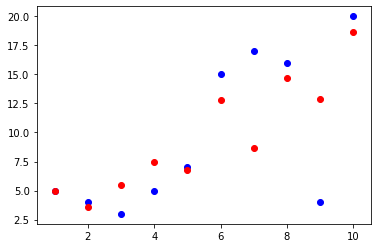

In [11]:
plt.scatter(x_train['X1'], y_train['y'], color = 'blue')
plt.scatter(x_train['X1'], lr.predict(x_train), color = 'red')

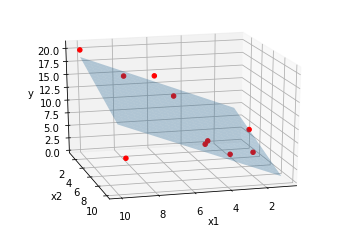

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x_grid = np.linspace(min(x_train['X1']), max(x_train['X1']), 20)
y_grid = np.linspace(min(x_train['X2']), max(x_train['X2']), 20)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
exog = pd.core.frame.DataFrame({'X1': x_grid.ravel(), 'X2': y_grid.ravel()})
out = lr.predict(exog)

ax.plot_surface(x_grid, y_grid, out.reshape(20, 20), rstride = 1, cstride = 1, alpha = 0.3)
ax.scatter(x_train['X1'], x_train['X2'], y_train['y'], color = 'red', marker = 'o', alpha = 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(20, 75)
plt.show()

In [14]:
import seaborn as sns

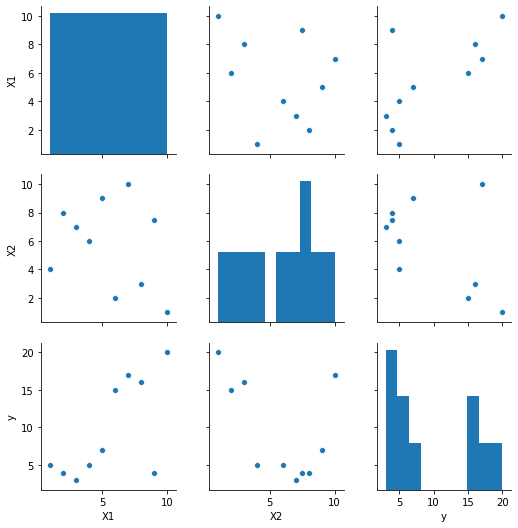

In [16]:
sns.pairplot(data = df, kind = 'scatter')

In [18]:
df.corr(method='pearson')

,X1,X2,y
X1,1.000000,-0.270679,0.681543
X2,-0.270679,1.000000,-0.482550
y,0.681543,-0.482550,1.000000


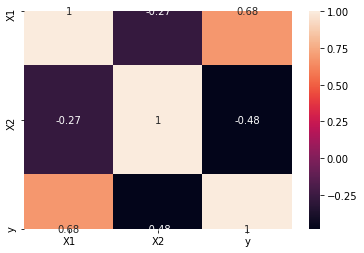

In [20]:
sns.heatmap(df.corr(), annot = True)
plt.show()